# <center><font color=navy> Machine Learning from Theory to Practice</font></center>
## <center><font color=navy>Recurrent Neural Networks</font> </center>
### <center> Ali Habibnia</center>

    
<center> Assistant Professor, Department of Economics, </center>
<center> and Division of Computational Modeling & Data Analytics at Virginia Tech</center>
 <center> habibnia@vt.edu </center> 

#### If you’re looking for more math: Goodfellow’s Deep Learning chapter on LSTM  
https://www.deeplearningbook.org/contents/rnn.html

- Feed Forward networks cannot handle sequential data. This means that they cannot work with inputs of different sizes and they do not store information about previous states (memory). Recurrent Neural Networks (RNNs) allowing overcome named limitations.

- The idea behind RNNs is to make use of sequential information. In a traditional neural network we assume that all inputs (and outputs) are independent of each other. But for many tasks that’s a very bad idea. If you want to predict the next word in a sentence you better know which words came before it. RNNs are called recurrent because they perform the same task for every element of a sequence, with the output being depended on the previous computations. 

- Another way to think about RNNs is that they have a “memory” which captures information about what has been calculated so far. In theory RNNs can make use of information in arbitrarily long sequences, but in practice they are limited to looking back only a few steps. Recurrent neural networks are used in speech recognition, language translation, stock predictions; It’s even used in image recognition to describe the content in pictures. 

- Technically, Recurrent Networks can be represented as Feed Forward networks expanded with a state variable and a recurrent loop.

Here is what a typical RNN looks like:

 <table><tr>    <td> <img src="images/1.PNG" alt="Drawing" style="width: 350px;"/> </td>
    <td> <img src="images/2.PNG" alt="Drawing" style="width: 550px;"/> </td>
</tr></table>

  <img src="images/11.PNG" alt="Drawing" style="width: 550px;"/>


As Recurrent Networks are applied in a variety of real-world problems, we can see different variations of the RNN architecture, which do not significantly alter the math behind. The examples of such application and respective models can be: (a) language translation, (b) video classification, (c ) image captioning, (d) autocomplete system.


The below diagrams shows a RNN being unrolled (or unfolded) into a full network. By unrolling we simply mean that we write out the network for the complete sequence. For example, if the sequence we care about is a sentence of 5 words, the network would be unrolled into a 5-layer neural network, one layer for each word.

 <table><tr>    <td> <img src="images/3.PNG" alt="Drawing" style="width: 450px;"/> </td>
    <td> <img src="images/4.PNG" alt="Drawing" style="width: 450px;"/> </td>
</tr></table>

 <table><tr>    <td> <img src="images/5.PNG" alt="Drawing" style="width: 450px;"/> </td>
    <td> <img src="images/6.PNG" alt="Drawing" style="width: 450px;"/> </td>
</tr></table>

 <table><tr>    <td> <img src="images/7.PNG" alt="Drawing" style="width: 450px;"/> </td>
    <td> <img src="images/8.PNG" alt="Drawing" style="width: 450px;"/> </td>
</tr></table>

 <table><tr>    <td> <img src="images/9.PNG" alt="Drawing" style="width: 450px;"/> </td>
    <td> <img src="images/10.PNG" alt="Drawing" style="width: 450px;"/> </td>
</tr></table>

## Mathematical understanding of RNN 

  <img src="images/12.PNG" alt="Drawing" style="width: 550px;"/>

  <img src="images/13.PNG" alt="Drawing" style="width: 550px;"/>
  
  - Unlike a traditional deep neural network, which uses different parameters at each layer, a RNN shares the same parameters across all steps. This reflects the fact that we are performing the same task at each step, just with different inputs. This greatly reduces the total number of parameters we need to learn.
  
  
  <img src="images/14.PNG" alt="Drawing" style="width: 750px;"/>
  
  
  
Training an RNN is similar to training a traditional Neural Network. We also use the backpropagation algorithm, but with a little twist. Because the parameters are shared by all time steps in the network, the gradient at each output depends not only on the calculations of the current time step, but also the previous time steps. For example, in order to calculate the gradient at t=4 we would need to backpropagate 3 steps and sum up the gradients. This is called Backpropagation Through Time (BPTT). For now, just be aware of the fact that vanilla RNNs trained with BPTT have difficulties learning long-term dependencies (e.g. dependencies between steps that are far apart) due to what is called the vanishing/exploding gradient problem. There exists some machinery to deal with these problems, and certain types of RNNs (like LSTMs) were specifically designed to get around them.

http://proceedings.mlr.press/v28/pascanu13.pdf

https://towardsdatascience.com/the-exploding-and-vanishing-gradients-problem-in-time-series-6b87d558d22
  
  <img src="images/15.PNG" alt="Drawing" style="width: 750px;"/>
  
  <img src="images/16.PNG" alt="Drawing" style="width: 750px;"/>




### Long Short Term Memory networks – usually just called “LSTMs”

LSTM networks are quite popular these days and we briefly talked about them above. LSTMs don’t have a fundamentally different architecture from RNNs, but they use a different function to compute the hidden state. The memory in LSTMs are called cells and you can think of them as black boxes that take as input the previous state h_{t-1} and current input x_t. Internally these cells  decide what to keep in (and what to erase from) memory. They then combine the previous state, the current memory, and the input. It turns out that these types of units are very efficient at capturing long-term dependencies. LSTMs can be quite confusing in the beginning but if you’re interested in learning more this post has an excellent explanation.

  <img src="images/17.PNG" alt="Drawing" style="width: 750px;"/>
  
  <img src="images/18.PNG" alt="Drawing" style="width: 800px;"/>

### Stock Market Predictions with LSTM in Python

In this task, the future stock prices of State Bank of India (SBIN) are predicted using the LSTM Recurrent Neural Network. 

In [51]:
! pip install nsepy
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

  Running setup.py bdist_wheel for nsepy ... done
  Stored in directory: /Users/aliila/Library/Caches/pip/wheels/05/2c/72/5324e267426eea65dec0c21a12a48b15887c0cf686c7a8fe11
Successfully built nsepy


In [53]:
# We will fetch 6 years of historical prices of SBIN
# For testing purpose, different data will be fetched later.

start = dt.datetime(2013,1,1)
end = dt.datetime(2018,12,31)
stk_data = gh(symbol='SBIN',start=start,end=end)

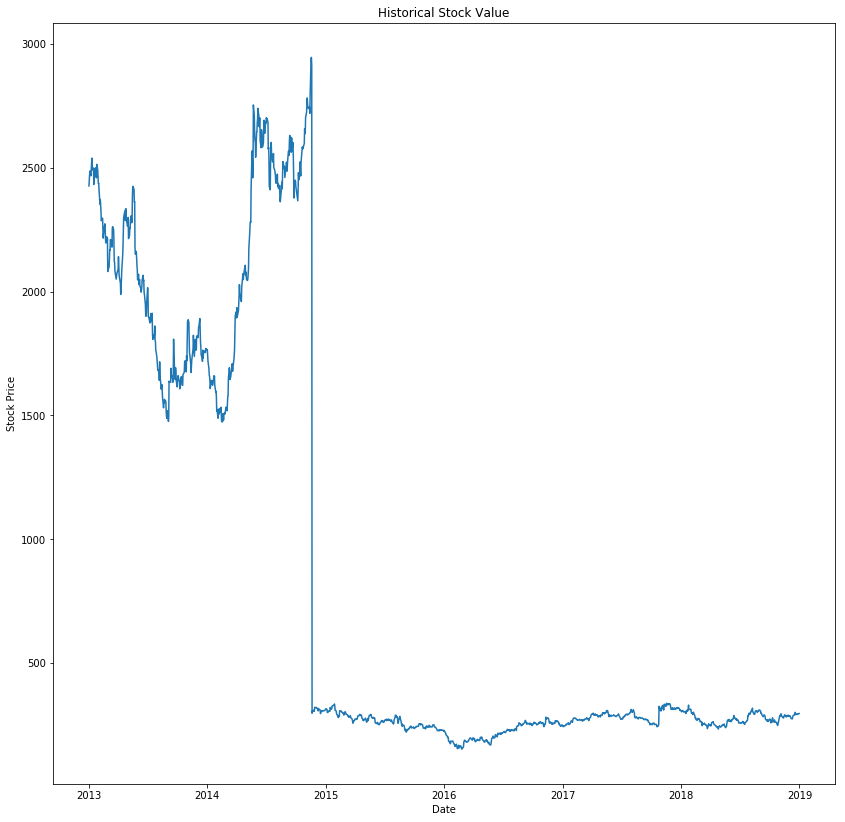

In [54]:
# We can visualise the fetched data in the above step. For simplicity, only the day-wise closing prices are visualised.

plt.figure(figsize=(14,14))
plt.plot(stk_data['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [55]:
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']

In [56]:
train_set = data2.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1482):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [57]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [58]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 15, batch_size = 32)

Train on 1422 samples
Epoch 1/15
1422/1422 [==============================] - 17s 12ms/sample - loss: 0.0194
Epoch 2/15
1422/1422 [==============================] - 10s 7ms/sample - loss: 0.0079
Epoch 3/15
1422/1422 [==============================] - 10s 7ms/sample - loss: 0.0076
Epoch 4/15
1422/1422 [==============================] - 10s 7ms/sample - loss: 0.0070
Epoch 5/15
1422/1422 [==============================] - 10s 7ms/sample - loss: 0.0057
Epoch 6/15
1422/1422 [==============================] - 10s 7ms/sample - loss: 0.0068
Epoch 7/15
1422/1422 [==============================] - 10s 7ms/sample - loss: 0.0055
Epoch 8/15
1422/1422 [==============================] - 10s 7ms/sample - loss: 0.0063
Epoch 9/15
1422/1422 [==============================] - 10s 7ms/sample - loss: 0.0051
Epoch 10/15
1422/1422 [==============================] - 10s 7ms/sample - loss: 0.0049
Epoch 11/15
1422/1422 [==============================] - 11s 8ms/sample - loss: 0.0045
Epoch 12/15
1422/1422 [======

In [66]:
testdataframe= gh(symbol='SBIN',start=dt.datetime(2019,1,1),end=dt.datetime(2019,9,18))
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 236):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [67]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

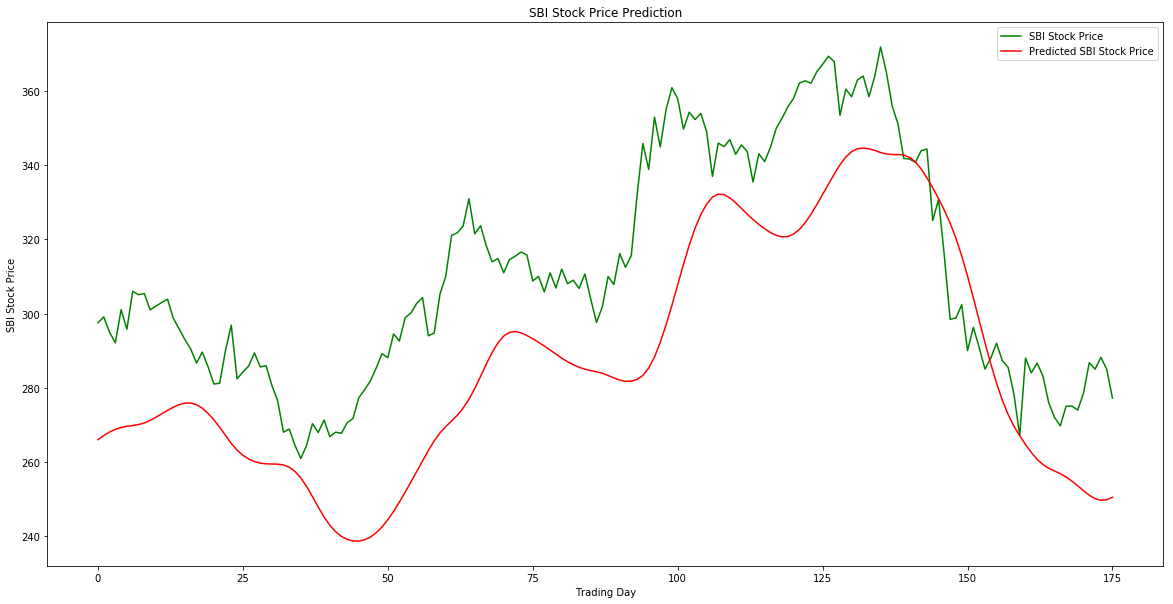

In [68]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'SBI Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()

In [72]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(real_stock_price,predicted_stock_price)

print(math.sqrt(mse))

28.76875136645206
